# Lab 3-1: Gaussian Smoke Stack
For this example, we want to plot concentrations downwind of a smokestack.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#First, we define some characteristics of our smokestack
Q = 85
# Q is a constant mass flux from the smokestack in kg/s
u = 4
# u is a constant wind speed in m/s at the effective stack height h
h = 150
# h is the effective height of the smokestack (actually stack height plus additional
# height the plume rises, in m

![smokestack_plume](Smokestack_gaussian_plume.png)

How much the plume spreads is a function of the distance from the stack, x, and the atmospheric stability.  We will incorporate the stability explicitly in lab 3-3.  
For now, we just define the values for our example.

In [3]:
x=1000 #not used, but referenced here because sigma values are a function of x, in m
sig_z=400
sig_y=800

# We are concerned with the centerline
y = 0
# And with how the plume concentration varies with height
# so we need to create a numpy array for a range of heights above the ground
z =  np.arange(0,600,1)

From lecture notes, we know that we can write
$$ C(x,y,z) = \frac{Q}{2\pi u\sigma_y\sigma_z}\exp(\frac{-(z-h)^2}{2\sigma_z^2})\exp(\frac{-y^2}{2\sigma_y^2}) $$

And then calculate and plot how the concentration looks downstream

In [4]:
C=Q/(2*np.pi*u*sig_z*sig_y)*np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2))) 

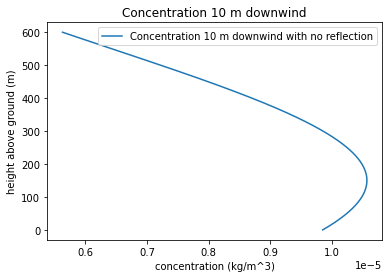

In [5]:
plt.figure()
plt.plot(C, z, label='Concentration 10 m downwind with no reflection')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 10 m downwind')
plt.legend(loc="best")

You'll notice in the plot that the plume is not all accounted for.  Some of it has hit the ground and been reflected.  We can account for this by adding in an imaginary source below the ground at a mirror of the effective smokestack height as illustrated below.
![Plume_reflection](Plume_reflection.png)

---
Using the Code and the plot above as an example, calculate the correct concentration with height above the surface, accounting for this reflection.  For reference, the equation, from lecture notes, including this reflection is
$$ C(x,y,z) = \frac{Q}{2\pi u\sigma_y\sigma_z}[\exp(\frac{-(z-h)^2}{2\sigma_z^2})+\exp(\frac{-(z+h)^2}{2\sigma_z^2})]\exp(\frac{-y^2}{2\sigma_y^2}) $$

In [ ]:
#Use this cell to write the python code for the equation with the reflection from the ground.

In [6]:
Cwreflect=Q/(2*np.pi*u*sig_z*sig_y)*(np.exp(-(np.power(z-h,2))/(2*np.power(sig_z,2)))+np.exp(-(np.power(z+h,2))/(2*np.power(sig_z,2))))*np.exp(-(np.power(y,2))/(2*np.power(sig_y,2)))

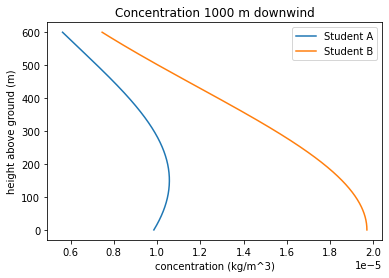

In [7]:
plt.figure()
plt.plot(C, z, label='Student A')
plt.plot(Cwreflect, z, label='Student B')
plt.ylabel('height above ground (m)')
plt.xlabel('concentration (kg/m^3)')
plt.title('Concentration 1000 m downwind')
plt.legend(loc="best")